# Kaggle TPS 10

## import requirements

In [30]:
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error,roc_curve,auc,accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
import optuna
from optuna.samplers import TPESampler

## read dataset

In [4]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

# EDA

## describe the datasets

In [16]:
# train.describe
test.describe

<bound method NDFrame.describe of              id        f0        f1        f2        f3        f4        f5  \
0       1000000  0.178216  0.435617  0.010230  0.202074  0.390170  0.324221   
1       1000001  0.181250  0.476455  0.022413  0.283146  0.598020  0.349508   
2       1000002  0.159721  0.451202  0.259649  0.365274  0.594634  0.413502   
3       1000003  0.182424  0.520976  0.095344  0.327742  0.741830  0.358711   
4       1000004  0.229329  0.336513  0.023511  0.300913  0.668738  0.481586   
...         ...       ...       ...       ...       ...       ...       ...   
499995  1499995  0.185473  0.525338  0.014945  0.204029  0.498957  0.431933   
499996  1499996  0.183194  0.553266  0.008055  0.280651  0.636591  0.478092   
499997  1499997  0.184650  0.533643  0.011218  0.201262  0.720698  0.472888   
499998  1499998  0.227731  0.513247  0.178603  0.313778  0.665656  0.401365   
499999  1499999  0.185561  0.406225  0.097598  0.327129  0.655168  0.384097   

              f6 

In [20]:
print(f"the label 1 takes {np.mean(train.target)}%")

the label 1 takes 0.500485%


## missing values distribution

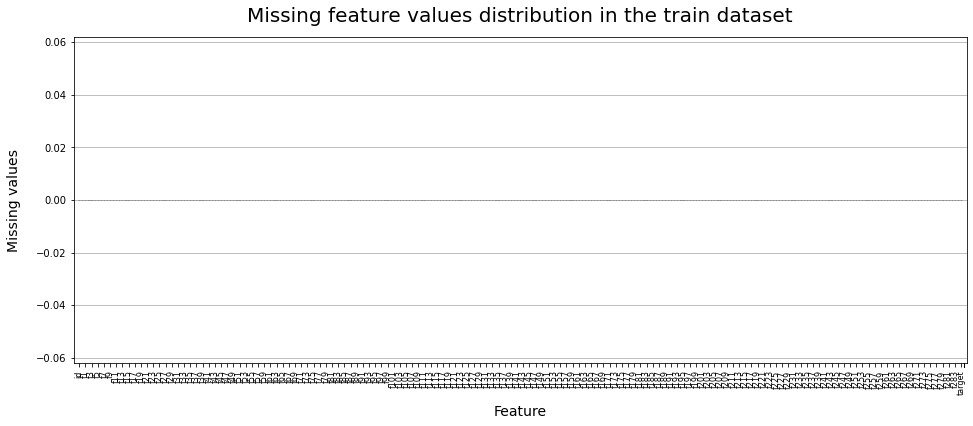

In [21]:
fig, ax = plt.subplots(figsize=(16, 6))

bars = ax.bar(train.isna().sum().index,
              train.isna().sum().values,
              color="lightskyblue",
              edgecolor="black",
              width=0.7)
ax.set_title("Missing feature values distribution in the train dataset", fontsize=20, pad=15)
ax.set_ylabel("Missing values", fontsize=14, labelpad=15)
ax.set_xlabel("Feature", fontsize=14, labelpad=10)
ax.set_xticks([x if i%2==0 else "" for i, x in enumerate(train.columns.values)])
ax.tick_params(axis="x", rotation=90, labelsize=8)
ax.margins(0.005, 0.12)
ax.grid(axis="y")

plt.show();

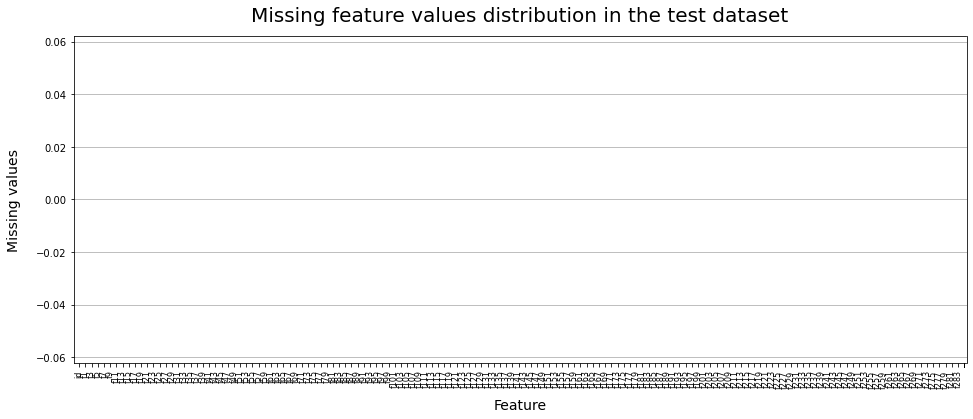

In [22]:
fig, ax = plt.subplots(figsize=(16, 6))

bars = ax.bar(test.isna().sum().index,
              test.isna().sum().values,
              width=0.7)
ax.set_title("Missing feature values distribution in the test dataset", fontsize=20, pad=15)
ax.set_ylabel("Missing values", fontsize=14, labelpad=15)
ax.set_xlabel("Feature", fontsize=14, labelpad=10)
ax.set_xticks([x if i%2==0 else "" for i, x in enumerate(test.columns.values)])
ax.tick_params(axis="x", rotation=90, labelsize=8)
ax.margins(0.005, 0.12)
ax.grid(axis="y")

plt.show();

In [23]:
train.isnull().sum()

id        0
f0        0
f1        0
f2        0
f3        0
         ..
f281      0
f282      0
f283      0
f284      0
target    0
Length: 287, dtype: int64

In [24]:
test.isnull().sum()

id      0
f0      0
f1      0
f2      0
f3      0
       ..
f280    0
f281    0
f282    0
f283    0
f284    0
Length: 286, dtype: int64

No missing values in both train and test dataset.

## corr matrix

In [26]:
corr_matrix = train.corr()

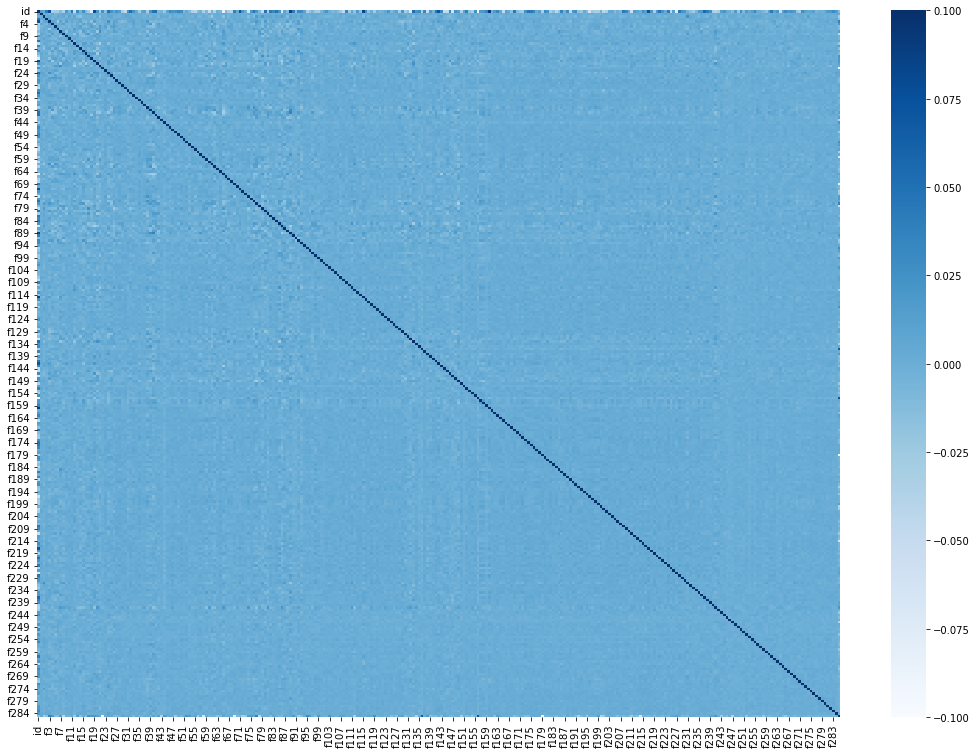

In [39]:
plt.figure(figsize=(18,13))
sns.heatmap(corr_matrix, cmap='Blues', vmax=0.1, vmin=-0.1)
plt.show()

.....okey, it seems like all 

In [46]:
corr_matrix.target.sort_values()

f22      -0.514074
f179     -0.154517
f69      -0.080759
f58      -0.068080
f214     -0.065694
            ...   
f3        0.036279
f77       0.037021
f136      0.066118
f156      0.071029
target    1.000000
Name: target, Length: 287, dtype: float64

In [ ]:
save